# EDA Guide
## Part 1 - Univariate Analysis


In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('talk')

In [3]:
# read in worker data
worker_df = pd.read_csv('data/workers.csv')
print(worker_df.shape)
worker_df.head()

(5000, 5)


,Worker ID,Worker Name,Hire Date,Worker Status,Team
0,1000,Paul Clark,2020-09-12,Part Time,SeaGreen
1,1001,Andrea White,2001-11-08,Full Time,Crimson
2,1002,Daniel Taylor,2002-06-10,Part Time,LightSteelBlue
3,1003,Ann Manning,2019-09-13,Per Diem,Crimson
4,1004,Brenda Gonzales,2000-12-23,Part Time,Crimson


In [4]:
# check number of unique values in the dataset
for i in list(worker_df.columns):
    print(f'Unique {i}: {worker_df[i].nunique()}')

Unique Worker ID: 5000
Unique Worker Name: 4820
Unique Hire Date: 4028
Unique Worker Status: 3
Unique Team: 4


In [5]:
# checking for null values
worker_df.isnull().sum()

Worker ID        0
Worker Name      0
Hire Date        0
Worker Status    0
Team             0
dtype: int64

In [6]:
# statistics about numerical data
### 'Worker ID' is the only numerical column  - this column is an identity column according to the readme
worker_df.describe()

,Worker ID
count,5000.000000
mean,3499.500000
std,1443.520003
min,1000.000000
25%,2249.750000
50%,3499.500000
75%,4749.250000
max,5999.000000


In [7]:
# checking column types
###### 'Hire Date' column isn't a date - we'll need to fix 
worker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Worker ID      5000 non-null   int64 
 1   Worker Name    5000 non-null   object
 2   Hire Date      5000 non-null   object
 3   Worker Status  5000 non-null   object
 4   Team           5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [8]:
# convert 'Hire Date' to datetime
worker_df['Hire Date'] = pd.to_datetime(worker_df['Hire Date'])

# check that it worked
print(worker_df.info())

# check date range of dataset
print(f"Min Date: {worker_df['Hire Date'].min()}")
print(f"Max Date: {worker_df['Hire Date'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Worker ID      5000 non-null   int64         
 1   Worker Name    5000 non-null   object        
 2   Hire Date      5000 non-null   datetime64[ns]
 3   Worker Status  5000 non-null   object        
 4   Team           5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 195.4+ KB
None
Min Date: 1991-07-11 00:00:00
Max Date: 2021-07-08 00:00:00


In [33]:
# I found this on stack overflow years ago and have been using it forever but cant find the reference
# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

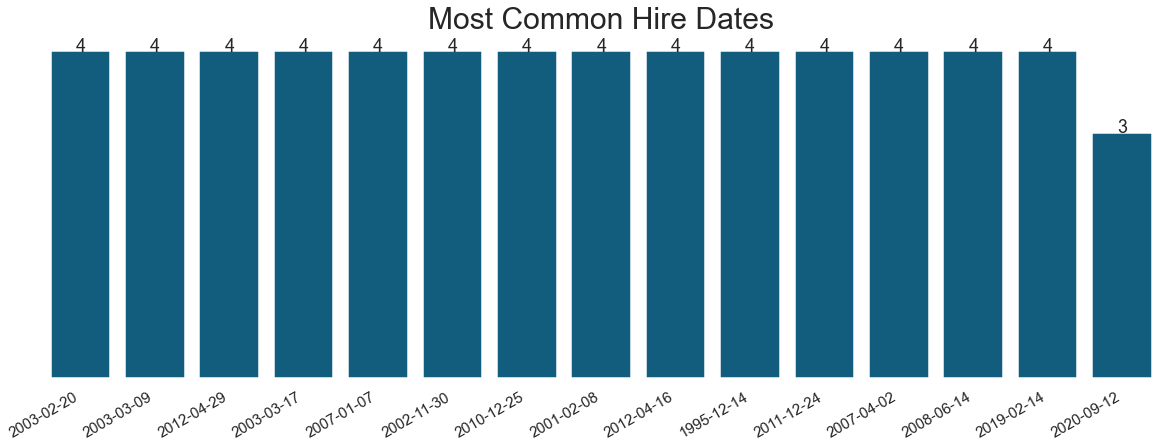

In [46]:
# visualize hire date
# first Count all unique dates
hire_dates = Counter(worker_df['Hire Date'].dt.date)

# get dates and date counts
common_dates = [d[0] for d in hire_dates.most_common(15)]
common_counts = [d[1] for d in hire_dates.most_common(15)]

# plot 20 most common hire dates
fig, ax = plt.subplots()
g = sns.barplot(common_dates, common_counts, palette=['#00638f'])
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Most Common Hire Dates', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.autofmt_xdate()
plt.show()

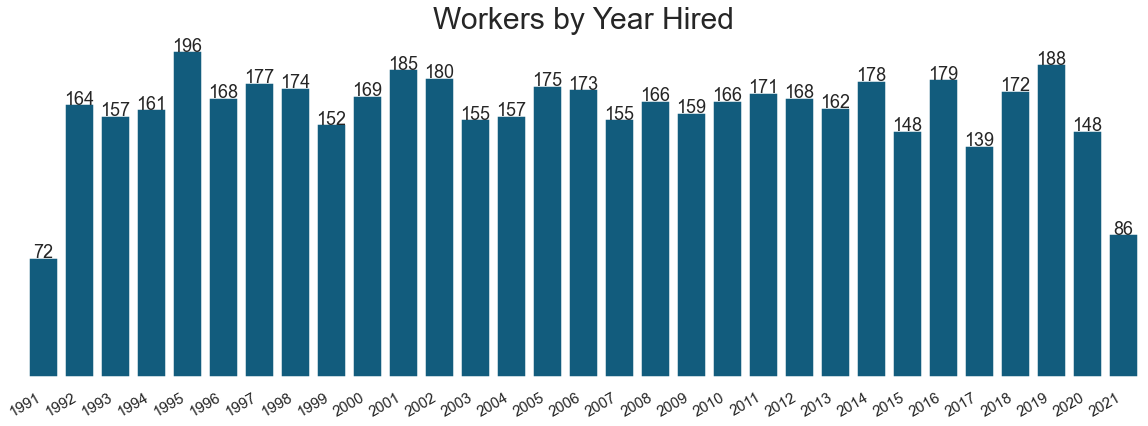

In [47]:
# visualize hire date
# first Count all unique dates
hire_dates = Counter(worker_df['Hire Date'].dt.year)

# get dates and date counts
common_dates = [d[0] for d in hire_dates.most_common()]
common_counts = [d[1] for d in hire_dates.most_common()]

# plot 20 most common hire dates
fig, ax = plt.subplots()
g = sns.barplot(common_dates, common_counts, color='#00638f') # first color in the colorblind palette
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Workers by Year Hired', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.autofmt_xdate()
plt.show()

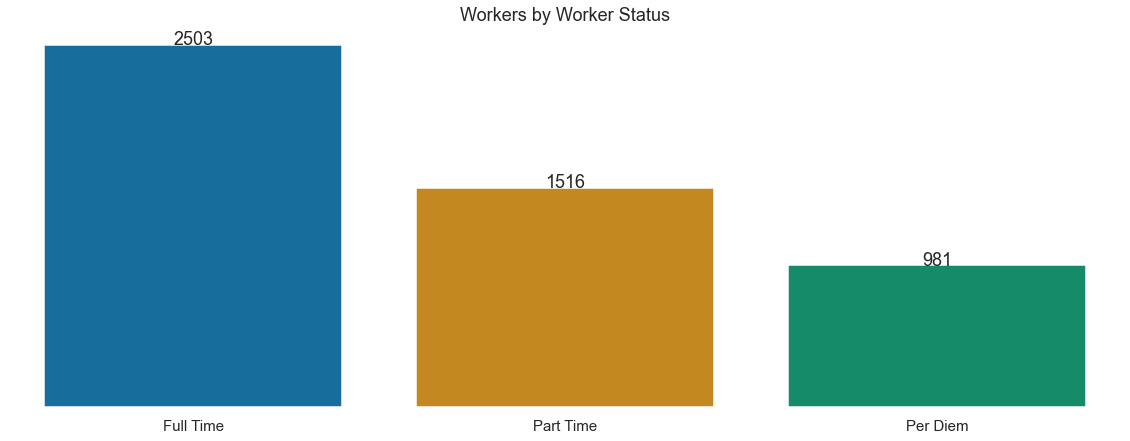

In [50]:
#visualize status feature
fig, ax = plt.subplots()
g = sns.countplot(x=worker_df['Worker Status'], order = worker_df['Worker Status'].value_counts().index, palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Workers by Worker Status')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

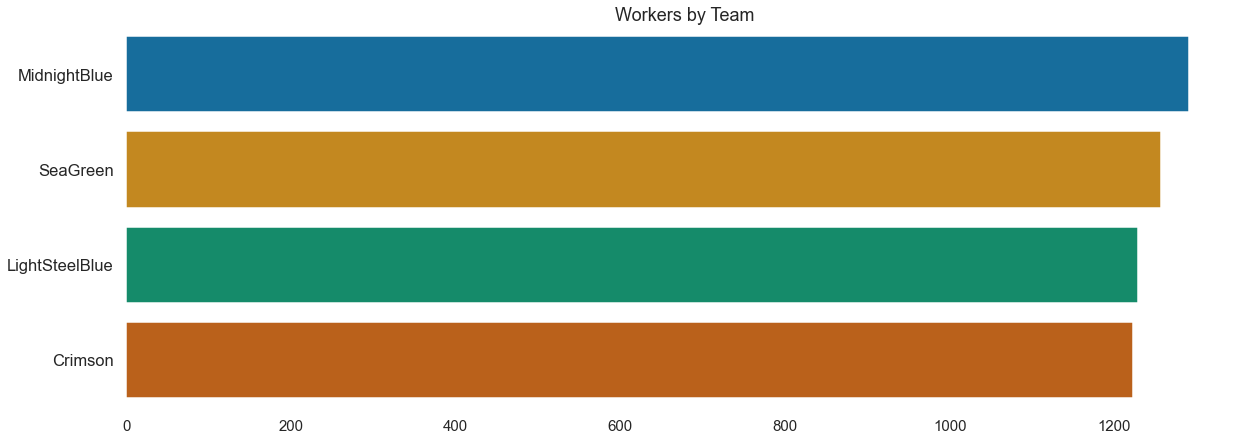

In [54]:
#visualize team feature
fig, ax = plt.subplots()
g = sns.countplot(y=worker_df['Team'], order = worker_df['Team'].value_counts().index, palette='colorblind')

plt.title('Workers by Team')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [12]:
# read in widget data
widget_df = pd.read_csv('data/widgets.csv')
print(widget_df.shape)
widget_df.head()

(2817555, 5)


,Item Number,Step 1,Step 2,Step 3,Worker ID
0,4411865360-1000,0.635369,4.377276,2.734590,1000
1,4411865392-1000,2.047647,3.870909,12.698644,1000
2,4411865424-1000,0.870676,6.347963,7.655127,1000
3,4411865456-1000,2.938096,3.933764,3.550750,1000
4,4411865488-1000,2.951892,3.363985,3.820368,1000


In [13]:
# checking for null values
widget_df.isnull().sum()

Item Number    0
Step 1         0
Step 2         0
Step 3         0
Worker ID      0
dtype: int64

In [14]:
# statistics about numerical data
widget_df.describe()

,Step 1,Step 2,Step 3,Worker ID
count,2.817555e+06,2.817555e+06,2.817555e+06,2.817555e+06
mean,2.999583e+00,4.999611e+00,4.000098e+00,3.503214e+03
std,1.730051e+00,9.998504e-01,4.000131e+00,1.438283e+03
min,1.551238e-02,-1.133441e-01,4.070183e-07,1.000000e+03
25%,1.727544e+00,4.325530e+00,1.149915e+00,2.268000e+03
50%,2.674542e+00,4.999830e+00,2.770930e+00,3.501000e+03
75%,3.920415e+00,5.674386e+00,5.546493e+00,4.749000e+03
max,2.119987e+01,9.963565e+00,6.497195e+01,5.999000e+03


In [15]:
# checking column types
widget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817555 entries, 0 to 2817554
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Item Number  object 
 1   Step 1       float64
 2   Step 2       float64
 3   Step 3       float64
 4   Worker ID    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 107.5+ MB


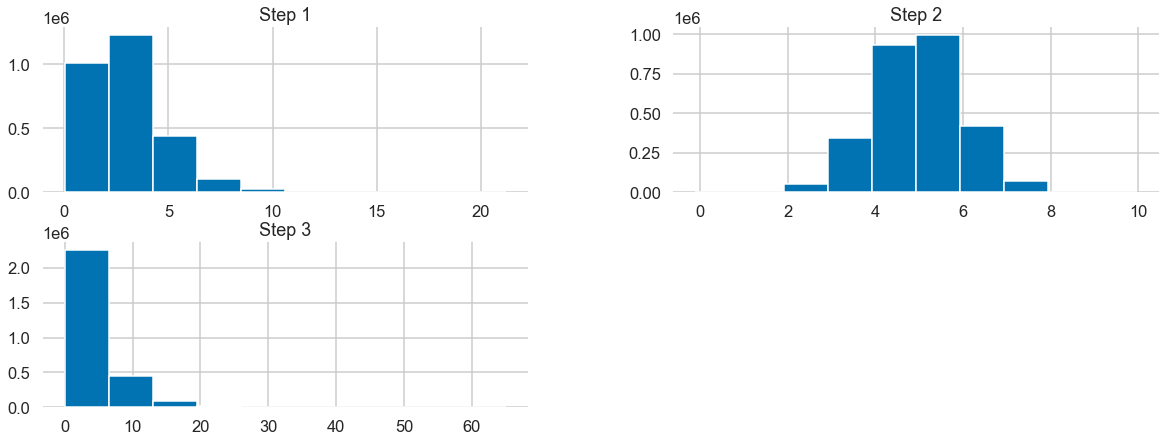

In [62]:
# create histograms of all numerical data
# we know worker id is an identity column so removing it from this visualization
widget_df_hist = widget_df[['Step 1', 'Step 2', 'Step 3']]
# this is a quick way to create histograms - but its harder to make it look pretty with this method
widget_df_hist.hist()
sns.despine(left=True, bottom=True)
plt.show()

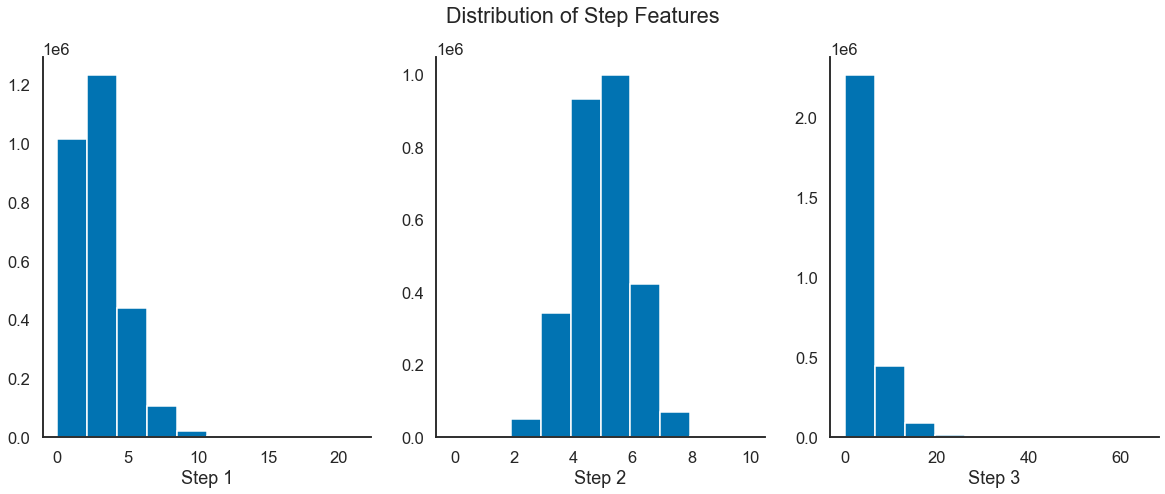

In [89]:
# create histograms of all numerical data - prettier version

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3)

ax0.hist(widget_df_hist['Step 1'])
ax1.hist(widget_df_hist['Step 2'])
ax2.hist(widget_df_hist['Step 3'])

fig.suptitle('Distribution of Step Features')

ax0.set(xlabel='Step 1')
ax1.set(xlabel='Step 2')
ax2.set(xlabel='Step 3')

# ax0.label_outer()
# ax1.label_outer()
# ax2.label_outer()
    
sns.despine()
plt.show()

In [94]:
# group the data to find widget making statistics by worker
widgets_grouped = widget_df.groupby(['Worker ID']).agg({'Item Number':'count',
                                                        'Step 1':['mean','median','min','max'],
                                                        'Step 2':['mean','median','min','max'],
                                                        'Step 3':['mean','median','min','max']}).reset_index()
widgets_grouped.head()

Worker ID Item Number    Step 1                                   Step 2  \
                  count      mean    median       min        max      mean   
0      1000         482  3.070280  2.769688  0.125459  12.444440  4.991148   
1      1001         767  3.055896  2.765591  0.442014  11.024066  5.027923   
2      1002         201  3.059709  2.741490  0.338830  12.215252  5.083601   
3      1003         585  3.066364  2.705782  0.175791  10.587877  5.009311   
4      1004         376  2.901795  2.544975  0.063468  10.953770  5.052831   

                                   Step 3                                 
     median       min       max      mean    median       min        max  
0  4.999767  2.410102  8.145692  4.391818  3.037905  0.028713  22.908053  
1  5.017918  2.099443  8.680220  4.042051  2.711614  0.014386  22.885953  
2  5.081746  2.697565  7.677551  3.759197  2.601193  0.009587  16.893653  
3  5.004230  1.498752  8.087960  3.912284  2.815251  0.003565  31.140860  
4  5.089172  2.221984  7.636476  3.908283  2.645137  0.033438  22.389739